In [15]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc
from skimage.transform import rotate
HEIGHT=28
WIDTH=28
CLASSNUMBER = 10
TRAIN_CLASS_NUMBER =55
TEST_CLASS_NUMBER=10
VALIDATION_CLASS_NUMBER = 5
TRAIN_DATA_NUMBER = CLASSNUMBER * TRAIN_CLASS_NUMBER
TEST_DATA_NUMBER = CLASSNUMBER*TEST_CLASS_NUMBER
VALIDATION_DATA_NUMBER = CLASSNUMBER * VALIDATION_CLASS_NUMBER
totalImages = 0
total_train_images=0
total_test_images=0

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data


#载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)#当前路径，‘’可以选择存放路径

In [ ]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [ ]:
ROOT_PATH = '/home/tang/targa/exp3/mnist_padding/'
train_data_directory = os.path.join(ROOT_PATH, "train")
validation_data_directory = os.path.join(ROOT_PATH, "validation")
test_data_directory = os.path.join(ROOT_PATH, "test")

In [ ]:
train_data_load_directory = os.path.join(ROOT_PATH,'pickForTrain')
validation_data_load_directory = os.path.join(ROOT_PATH,'pickForValidation')
test_data_load_directory = os.path.join(ROOT_PATH,'pickupForTest')

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)
mnistNoOnehot = input_data.read_data_sets('MNIST_data')

In [ ]:
X_train = mnist.train.images*255
Y_train = mnist.train.labels
X_val = mnist.validation.images*255
Y_val = mnist.validation.labels
X_test = mnist.test.images*255
Y_test = mnist.test.labels

In [ ]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(X_train)))
print("- Validation-set:\t{}".format(len(X_val)))
print("- Test-set:\t\t{}".format(len(X_test)))

In [ ]:
Y_test[0]

In [ ]:
X_train_reshape = np.reshape(X_train,(55000,28,28))
Y_train_reshape = mnistNoOnehot.train.labels
X_test_reshape = np.reshape(X_test,(10000,28,28))
Y_test_reshape = mnistNoOnehot.test.labels
X_val_reshape = np.reshape(X_val,(5000,28,28))
Y_val_reshape = mnistNoOnehot.validation.labels

In [ ]:
##############sampling data for training
load_train_images = X_train_reshape
load_train_labels = Y_train_reshape

In [ ]:
count=0
for x in range(0,TRAIN_DATA_NUMBER):
    img = load_train_images[x]
    filename=train_data_load_directory+'/'+str(load_train_labels[x])+'/'+str(load_train_labels[x])+'-'+str(x)+'.jpg'
    plt.imsave(filename,img)
    print(filename)
    count+=1
    print('training images = '+str(count))

In [ ]:
#################sampling data for testing
load_test_images = X_test_reshape
load_test_labels = Y_test_reshape
count=0
for x in range(0,TEST_DATA_NUMBER):
    img = load_test_images[x]
    filename=test_data_load_directory+'/'+str(load_test_labels[x])+'/'+str(load_test_labels[x])+'-'+str(x)+'.jpg'
    plt.imsave(filename,img)
    print(filename)
    count+=1
    print('testing images = '+str(count))

In [ ]:
#################sampling data for validation
load_validation_images = X_val_reshape
load_validation_labels = Y_val_reshape
count=0
for x in range(0,VALIDATION_DATA_NUMBER):
    img = load_test_images[x]
    filename=validation_data_load_directory+'/'+str(load_validation_labels[x])+'/'+str(load_validation_labels[x])+'-'+str(x)+'.jpg'
    plt.imsave(filename,img)
    print(filename)
    count+=1
    print('testing images = '+str(count))

In [17]:
#################sampling data for enlarge
train_images=load_train_images
train_labels = load_train_labels
validation_images=load_validation_images
validation_labels = load_validation_labels
test_images = load_test_images
test_labels = load_test_labels

In [18]:
RESIZED_HEIGHT = 160
RESIZED_WIDTH = 160
from PIL import Image, ImageOps
from skimage.transform import PiecewiseAffineTransform, warp
top, bottom = [int((RESIZED_HEIGHT-HEIGHT)/2)]*2
left, right = [int((RESIZED_WIDTH-WIDTH)/2)]*2

color = [0,0,0]

In [ ]:
i=0
for p in range(0,TRAIN_DATA_NUMBER):
    img = train_images[i]
    img_with_border_train = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
        
    filename=train_data_directory+'/'+str(train_labels[i])+'/'+ str(train_labels[i])+'_'+str(i)+'.jpg'
    plt.imsave(filename, img_with_border_train)        
    print(filename)
    i+=1

In [ ]:
i=0
for p in range(0,VALIDATION_DATA_NUMBER):
    img = validation_images[i]
    img_with_border_validation = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
        
    filename=validation_data_directory+'/'+str(validation_labels[i])+'/'+ str(validation_labels[i])+'_'+str(i)+'.jpg'
    plt.imsave(filename, img_with_border_validation)  
    print(filename)
    i+=1

In [ ]:
i=0
for p in range(0,TEST_DATA_NUMBER):
    img = test_images[i]
    img_with_border_test = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    filename=test_data_directory+'/'+str(test_labels[i])+'/'+ str(test_labels[i])+'_'+str(i)+'.jpg'
    plt.imsave(filename, img_with_border_test)
        
    print(filename)
    i+=1


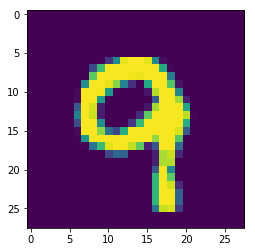

In [31]:
plt.imshow(img)

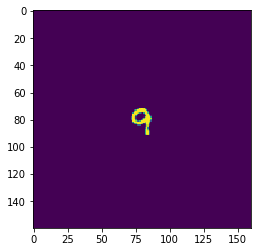

In [34]:
plt.imshow(img_with_border_test)